In [9]:
# This is a basic stock price predictor 

In [10]:
import numpy as np
import pandas_datareader as web
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [11]:
#Get the stock quote
df = web.DataReader('GOOGL', data_source='yahoo', start='2012-01-01', end='2020-1-1')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,334.409424,326.511505,326.796783,333.038025,7345600.0,333.038025
2012-01-04,335.460449,330.640656,332.847839,334.474487,5722200.0,334.474487
2012-01-05,332.317322,328.443451,331.396393,329.834839,6559200.0,329.834839
2012-01-06,330.330322,325.220215,329.904907,325.335327,5380400.0,325.335327
2012-01-09,323.823822,310.925934,323.573578,311.541534,11633500.0,311.541534
2012-01-10,317.217224,308.763763,315.190186,311.881897,8782400.0,311.881897
2012-01-11,315.010010,310.870880,312.062073,313.293304,4795200.0,313.293304
2012-01-12,316.761749,313.563568,315.925934,315.135132,3746600.0,315.135132
2012-01-13,313.788788,310.840851,313.443451,312.807800,4609900.0,312.807800


In [12]:
df.shape

(2012, 6)

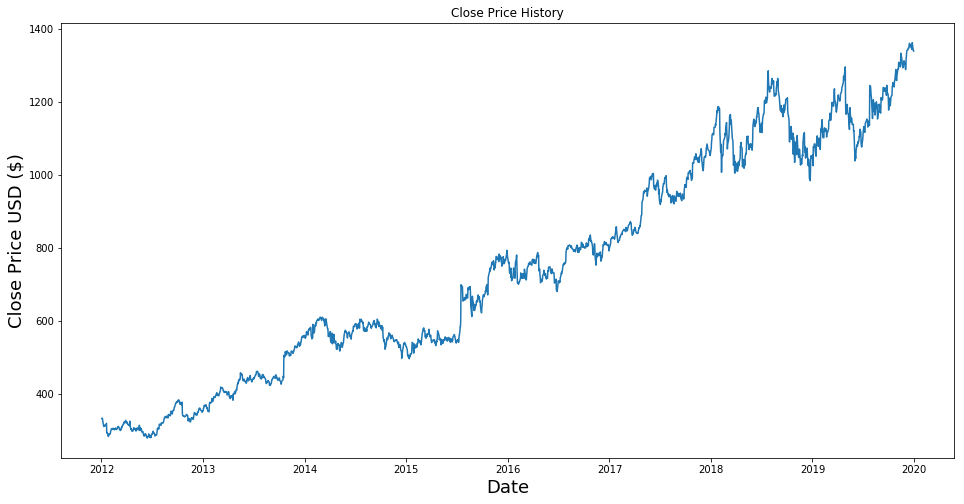

In [13]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# we will just use 80 % for training

In [14]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1610

In [15]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04916868],
       [0.05049546],
       [0.04621007],
       ...,
       [0.99276789],
       [0.97897779],
       [0.97868228]])

In [16]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.04916868, 0.05049546, 0.04621007, 0.04205411, 0.02931352,
       0.02962789, 0.03093153, 0.03263273, 0.0304831 , 0.03214272,
       0.0341444 , 0.03722323, 0.01245398, 0.01223668, 0.01011482,
       0.00482626, 0.00418367, 0.00967563, 0.00861699, 0.00973572,
       0.01006859, 0.01204715, 0.01723401, 0.02313277, 0.02206027,
       0.0234841 , 0.02422839, 0.02166271, 0.02457047, 0.02344249,
       0.02150089, 0.0219447 , 0.02107559, 0.02540259, 0.02260113,
       0.02175516, 0.02350721, 0.02323447, 0.02743203, 0.02736732,
       0.02928578, 0.02875417, 0.02551816, 0.02122352, 0.02207413,
       0.02223131, 0.01904615, 0.02131135, 0.02715002, 0.02632255,
       0.02869869, 0.03050621, 0.03463906, 0.03441254, 0.03741276,
       0.04021885, 0.03861933, 0.04173514, 0.04066726, 0.04470765])]
[0.04130984634114965]

[array([0.04916868, 0.05049546, 0.04621007, 0.04205411, 0.02931352,
       0.02962789, 0.03093153, 0.03263273, 0.0304831 , 0.03214272,
       0.0341444 , 0.03722323, 0.01

In [17]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1550, 60, 1)

In [19]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1550/1550 [==============================] - 75s 48ms/step - loss: 0.5413
Epoch 2/10
1550/1550 [==============================] - 79s 51ms/step - loss: 0.5376
Epoch 3/10
1550/1550 [==============================] - 79s 51ms/step - loss: 0.5381
Epoch 4/10
1550/1550 [==============================] - 73s 47ms/step - loss: 0.5372 0s - loss:
Epoch 5/10
1550/1550 [==============================] - 73s 47ms/step - loss: 0.5398
Epoch 6/10
1550/1550 [==============================] - 76s 49ms/step - loss: 0.5395
Epoch 7/10
1537/1550 [============================>.] - ETA: 0s - loss: 0.5412

In [30]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
  

In [31]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [32]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [33]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [34]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

31.974579486804014

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


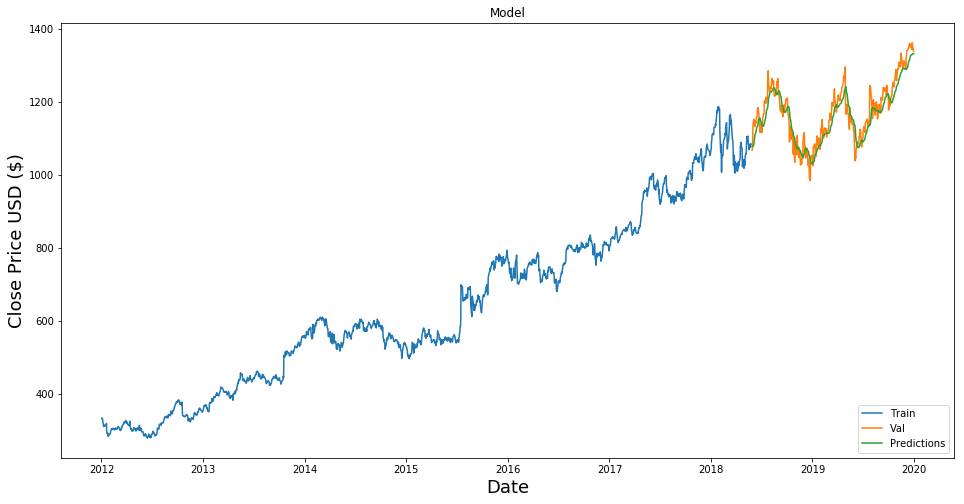

In [35]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# This is our prediction chart

In [28]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-29,1068.069946,1079.074097
2018-05-30,1077.469971,1078.309937
2018-05-31,1100.000000,1077.657471
2018-06-01,1135.000000,1078.637329
2018-06-04,1153.040039,1082.841919
2018-06-05,1151.020020,1089.730713
2018-06-06,1146.949951,1097.493530
2018-06-07,1134.420044,1104.974976
2018-06-08,1132.709961,1110.922241
